<a href="https://colab.research.google.com/github/JFernando6321/computational-physics-projects/blob/main/M%C3%A9todo_de_euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://ecfm.usac.edu.gt/sites/default/files/2019-02/cintillo.png" width="1000" alt="ecfm logo">
</center>


##Método de Euler ##


Autor: Julio Fernando Vicente Maldonado
## Objetivos

* Desarrollar un algoritmo para la simulación de trayectorias de proyectiles
* Comparación de trayectorias con y sin resistencia del aire
* Determinación del alcance máximo del proyectil
* Verificación numérica del ángulo óptimo de lanzamiento sin resistencia del aire.
* Optimización del ángulo de lanzamiento con resistencia del aire

## Desarrollar un algoritmo de simulación de trayectorias de proyectiles
Empecemos por definir la función que resuelve las ecuaciones diferenciales.
Añadiremos una condicional para tener en cuenta la resistencia del aire.

Donde tomaremos los siguientes valores iniciales para resolver el sistema de ecuaciones:

* $\frac{B_2}{m} = 0.00004 m^{-1}$

* $g= 9.8 m/s^2 $
* $v_0 = 700 $
* Ángulo de salida $\theta = \frac{\pi}{6} $
* El número de valores a calcular: $N= 10^5$
* $\Delta t= 0.01s $

In [1]:
###############################################################################
#################### función de euler para el proyectil ######################
###############################################################################

import numpy as np

#Definir la función para resolver ecuaciones diferenciales con y sin resistencia
def proyectil(B2_m, g, v0, theta, N, dt, resistencia=True, stop_ground=True):
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    x, y = 0.0, 0.0
    X, Y = [x], [y]


   # Bucle para calcular la trayectoria
    for i in range(N):
        if stop_ground and y <= 0 and i > 0:  # Detener si el proyectil toca el suelo
            break

        # Calcular la magnitud de la velocidad
        v = np.sqrt(vx**2 + vy**2)

        # Actualizar las componentes de la aceleración y velocidad
        ax = -B2_m * v * vx
        ay = -g - B2_m * v * vy

        # Método de Euler para la siguiente posición y velocidad
        vx += ax * dt
        vy += ay * dt
        x += vx * dt
        y += vy * dt

        # Almacenar las posiciones
        X.append(x)
        Y.append(y)

    return X, Y
#Definimos los parametros iniciales
B2_m:float = 0.00004  #  m^{-1}
g:float = 9.8         #   m/s^2
v0:int = 700        #   m/s
theta:float = np.pi/6  #  30°
N:int = 100000
dt:float = 0.01       #  s
X, Y = proyectil(B2_m, g, v0, theta, N, dt)

## Comparación de trayectorias con y sin resistencia del aire

Calculemos ahora la trayectoria del proyectil con y sin resistencia del aire y comparémoslas.

In [2]:
# Simulación sin resistencia del aire
X_without_resistencia, Y_without_resistencia = proyectil(0, g, v0, theta, N, dt, stop_ground=True)

""" Aquí podemos probar y que pasaría si decidieramos hacer todas las iteraciones para N
y colocar en la funcion stop_ground=False, en este caso obtendríamos una gráfica
que tiene alturas negativas, lo cual no tiene sentido ya que no puede haber altura
negativa, osea que el proyectil nunca llega al suelo.
X_without_resistencia, Y_without_resistencia = proyectil(0, g, v0, theta, N, dt, stop_ground=False)
X_with_resistencia, Y_with_resistencia = proyectil(B2_m, g, v0, theta, N, dt, stop_ground=False)
"""
# Simulación con resistencia del aire
X_with_resistencia, Y_with_resistencia = proyectil(B2_m, g, v0, theta, N, dt, stop_ground=True)


<Figure size 1500x500 with 0 Axes>

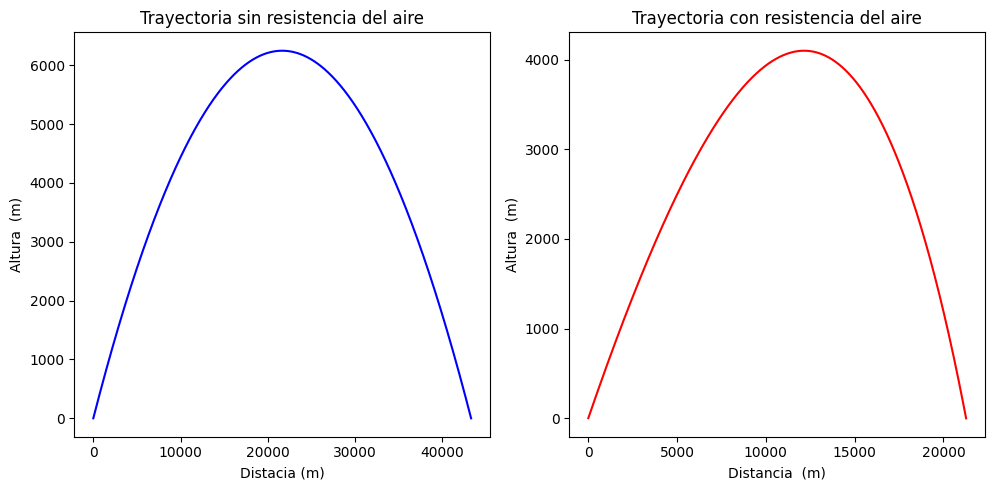

In [3]:
###############################################################################
################################ Gráficas #####################################
###############################################################################
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.figure(figsize=(15, 5))

### Graphic for the case without resistance
plt.subplot(1, 3, 1)
plt.plot(X_without_resistencia, Y_without_resistencia, 'b')
plt.title('Trayectoria sin resistencia del aire')
plt.xlabel('Distacia (m)')
plt.ylabel('Altura  (m)')

### Graphic for the case with resistance
plt.subplot(1, 3, 2)
plt.plot(X_with_resistencia, Y_with_resistencia, 'r')
plt.title('Trayectoria con resistencia del aire')
plt.xlabel('Distancia  (m)')
plt.ylabel('Altura  (m)')


plt.tight_layout()
plt.show()


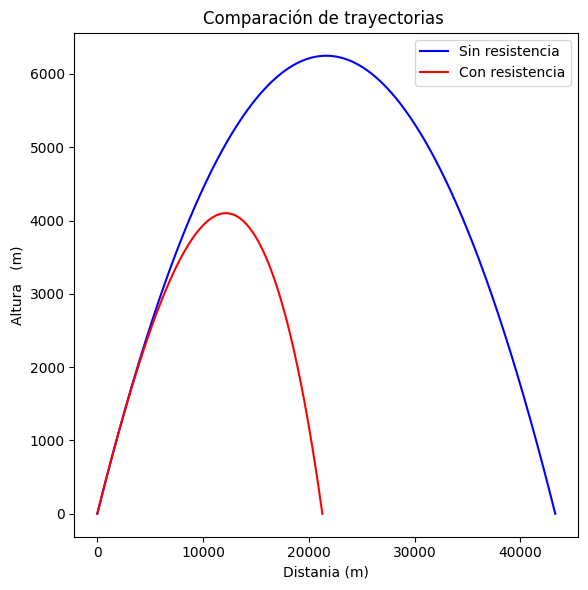

In [4]:

### Ahoara comparemos estas dos en una misma grafica
plt.figure(figsize=(17, 6))
plt.subplot(1, 3, 3)
plt.plot(X_without_resistencia, Y_without_resistencia, 'b', label='Sin resistencia')
plt.plot(X_with_resistencia, Y_with_resistencia, 'r', label='Con resistencia')
plt.title('Comparación de trayectorias ')
plt.xlabel('Distania (m)')
plt.ylabel('Altura   (m)')
plt.legend()

plt.tight_layout()
plt.show()

Con estas gráficas podemos ver que se ha acortado tanto la distancia recorrida en el eje x asi como disminuido significativamente la altura de la trayectoria cuando hay aire, esto a tiempos de vuelo muy largos ya que la diferencia no puede ser muy notable al principio de la trayectoria. Esto se debe a que la resistencia del aire es muy pequeña.

##Determinación del alcance máximo del proyectil

Modifiquemos la función proyectil para que nos dé el alcance máximo cuando el proyectil está al nivel del suelo, es decir, cuando el eje $y= 0$.


In [5]:
###############################################################################
#########3 Modificar la función de cálculo del alcance máximo ##############
###############################################################################

def proyectil(B2_m, g, v0, theta, N, dt, resistencia=True):
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    x, y = 0.0, 0.0
    X, Y = [x], [y]

    for i in range(N):
        if y <= 0 and i > 0:  # Para cuando el proyectil toca el suelo
            break

        # Cálculo de aceleraciones con/sin resistencia
        if resistencia:
            v = np.sqrt(vx**2 + vy**2)
            ax = -B2_m * v * vx
            ay = -g - B2_m * v * vy
        else:
            ax = 0
            ay = -g

        # Método de Euler
        vx += ax * dt
        vy += ay * dt
        x += vx * dt
        y += vy * dt

        X.append(x)
        Y.append(y)

    # Alcance máximo es el último valor de X cuando y <= 0
    maximum_range = X[-1]
    return X, Y, maximum_range
"""
Obtenemos el valor máximo de x, al tomar el último valor de X cuando se cumpla
que y <= 0 ya que es el momento en el que el proyectil toca el suelo.
"""

'\nObtenemos el valor máximo de x, al tomar el último valor de X cuando se cumpla\nque y <= 0 ya que es el momento en el que el proyectil toca el suelo.\n'

Creamos instancias para esta nueva función para cada caso, con resistencia del aire y sin resistencia del aire.

In [6]:
# Calcular el alcance máximo con y sin resistencia del aire
range_without_resistance = proyectil(0, g, v0, theta, N, dt, resistencia=False)
range_with_resistance = proyectil(B2_m, g, v0, theta, N, dt, resistencia=True)

# Mostrar los alcances máximos
print(f"Alcance máximo sin resistencia del aire: {range_without_resistance[2]:.2f} m")
print("----------------------------------------------------------------------")
print(f"Alcance máximo con resistencia al airee: {range_with_resistance[2]:.2f} m")

Alcance máximo sin resistencia del aire: 43296.07 m
----------------------------------------------------------------------
Alcance máximo con resistencia al airee: 21278.03 m


## Verificación numérica del ángulo óptimo de lanzamiento sin resistencia del aire

Teóricamente para los casos ideales, donde no hay resistencia del aire el alcance máximo se alcanza a los $45°$, hagamos un barrido desde $0$ hasta $\frac{\pi}{2}$ con una gráfica de alcance frente a ángulo de lanzamiento, para verificar que alturas se alcanzan para cada ángulo.

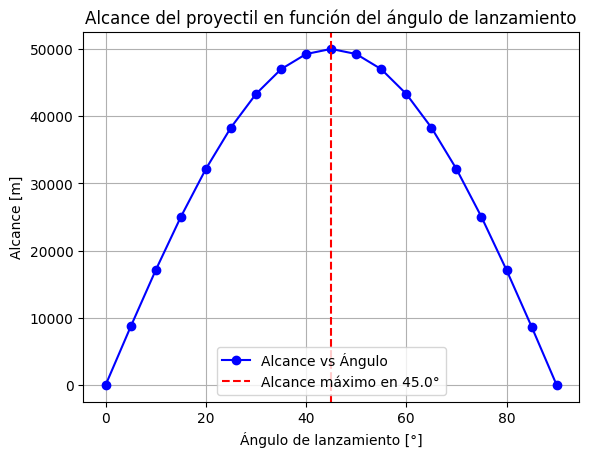

---------------------------------
---------------------------------
El ángulo que maximiza el alcance es: 45.0° con un alcance de 50007.30 m


In [12]:
# Función que calcula el alcance sin resistencia del aire para un ángulo dado

def range_without_resistance(theta):
    theta_rad = np.radians(theta)
    vx = v0 * np.cos(theta_rad)
    vy = v0 * np.sin(theta_rad)
    x = 0
    y = 0

    while y >= 0:  # la simulación sigue hasta que el proyectil toque el suelo.
        x += vx * dt
        y += vy * dt
        vy -= g * dt

    return x

# Variamos los ángulos de 0 a 90°, con pasos de 5°.
angles = np.arange(0, 91, 5)
alcances = []

# Calculate the range for each angle
for theta in angles:
    alcance = range_without_resistance(theta)
    alcances.append(alcance)

# Encontrar el ángulo que maximiza el alcance
angle_max_alcance = angles[np.argmax(alcances)]
max_alcance = max(alcances)

# Gráfica del alcance en función del ángulo
plt.plot(angles, alcances, 'bo-', label='Alcance vs Ángulo')
plt.axvline(x=angle_max_alcance, color='r', linestyle='--', label=f'Alcance máximo en {angle_max_alcance:.1f}°')
plt.title('Alcance del proyectil en función del ángulo de lanzamiento')
plt.xlabel('Ángulo de lanzamiento [°]')
plt.ylabel('Alcance [m]')
plt.legend()
plt.grid(True)
plt.show()

print("---------------------------------")
print("---------------------------------")
print(f"El ángulo que maximiza el alcance es: {angle_max_alcance:.1f}° con un alcance de {max_alcance:.2f} m")


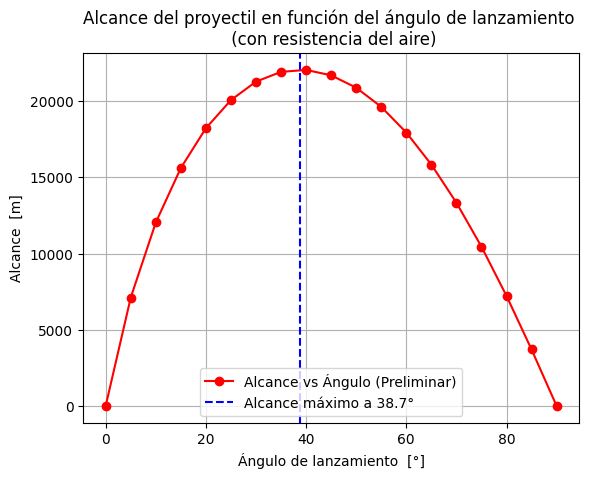

---------------------------------
El ángulo que maximiza el alcance en la búsqueda preliminar es: 40.0° con un alcance de 22047.40 m
---------------------------------
El ángulo que maximiza el alcance en la búsqueda refinada es: 38.71999999999986° con un alcance de 22063.56 m


In [16]:
### Función que calcula el alcance máximo con resistencia al aire variable#####
"""
Para esto vamos hacer variar el ángulo primero de 5 en 5 grados,
vemos que este ángulo máximo esta por 38 a 40 grados, ahora volvemos a calcular
el alcance máximo con un barrido de 0.01 grados, acá obtenemos el alcance máximo
con más presicion, teniendo este rango de iteraciones podemos obtener un ángulo
mucho más presizo sin gastar muchos recursos.
"""
def range_with_resistence(theta):
    theta_rad = np.radians(theta)
    vx = v0 * np.cos(theta_rad)
    vy = v0 * np.sin(theta_rad)
    x = 0
    y = 0

    while y >= 0:
        v = np.sqrt(vx**2 + vy**2)
        ax = -B2_m * v * vx
        ay = -g - B2_m * v * vy
        vx += ax * dt
        vy += ay * dt
        x += vx * dt
        y += vy * dt

    return x

# Buscamos preliminarmente el máximo con ángulos en pasos de 5°
angles_preliminar = np.arange(0, 91, 5)
alcances_preliminar = []

# Calculamos el alcance para cada ángulo preliminar
for theta in angles_preliminar:
    alcance = range_with_resistence(theta)
    alcances_preliminar.append(alcance)

# Encontrar el rango donde se encuentra el máximo
angle_max_preliminar = angles_preliminar[np.argmax(alcances_preliminar)]
max_alcance_preliminar = max(alcances_preliminar)

# Refinar la búsqueda en el rango cercano al máximo preliminar ( entre 38° y 40°)
angles_refinado = np.arange(angle_max_preliminar - 2, angle_max_preliminar + 2.5, 0.01)
alcances_refinado = []

# Calculamps el alcance para cada ángulo refinado
for theta in angles_refinado:
    alcance = range_with_resistence(theta)
    alcances_refinado.append(alcance)

# Encontramos el ángulo que maximiza el alcance refinado
angle_max_refinado = angles_refinado[np.argmax(alcances_refinado)]
max_alcance_refinado = max(alcances_refinado)

#Gráfica del alcanse en función del ángulo

plt.plot(angles_preliminar, alcances_preliminar, 'ro-', label='Alcance vs Ángulo (Preliminar)')
# Línea vertical indicando el máximo refinado
plt.axvline(x=angle_max_refinado, color='b', linestyle='--', label=f'Alcance máximo a {angle_max_refinado:.1f}°')

plt.title('Alcance del proyectil en función del ángulo de lanzamiento \n (con resistencia del aire)')
plt.xlabel('Ángulo de lanzamiento  [°]')
plt.ylabel('Alcance  [m]')
plt.legend()
plt.grid(True)
plt.show()
#Imprimir resultados
print("---------------------------------")
print(f"El ángulo que maximiza el alcance en la búsqueda preliminar es: {angle_max_preliminar:.1f}° con un alcance de {max_alcance_preliminar:.2f} m")
print("---------------------------------")
print(f"El ángulo que maximiza el alcance en la búsqueda refinada es: {angle_max_refinado}° con un alcance de {max_alcance_refinado:.2f} m")